# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 73498.79 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 98388.62 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 123563.36 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 135627.67 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 145577.78 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 146038.77 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 76239.97 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 106168.74 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 123814.07 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 134580.50 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 139256.43 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 148019.35 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.98 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.61 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 38.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.95 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.83 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.29 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.74 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.28 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.17 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.93 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.16 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.82 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.70 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.82 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.77 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.45 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 41.42 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.02 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.97 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 47.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.86 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.42 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.08 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.71 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:11, 15.06 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.07 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 32.97 examples/s]

Map:  64%|██████▍   | 128/200 [00:04<00:01, 38.32 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 42.46 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 44.20 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 43.84 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.72 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.31 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.82 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.40 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.83 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.12 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.85 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.12 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.52 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.20 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.32 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.77 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.68 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.61 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.30 examples/s]

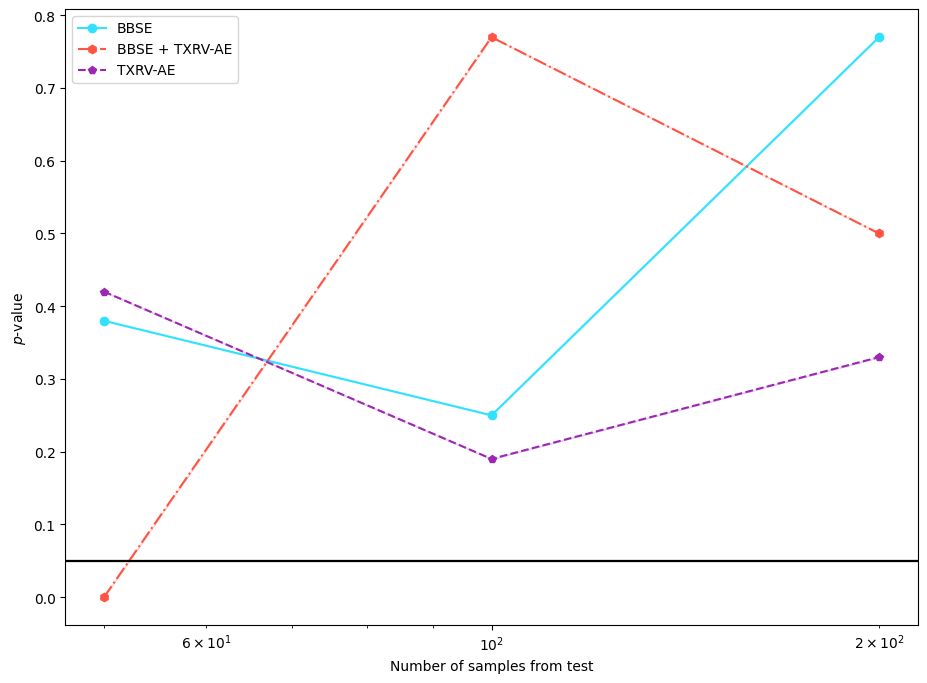

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.01 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.31 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.34 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.93 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.38 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.85 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.20 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.66 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.68 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.61 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.12 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.83 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.62 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.41 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.84 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.83 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.00 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.33 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.12 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.90 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.01 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.58 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.97 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.26 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.04 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.16 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.08 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.45 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.68 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.40 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.16 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.67 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.76 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.32 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.48 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.79 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.27 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.83 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.73 examples/s]

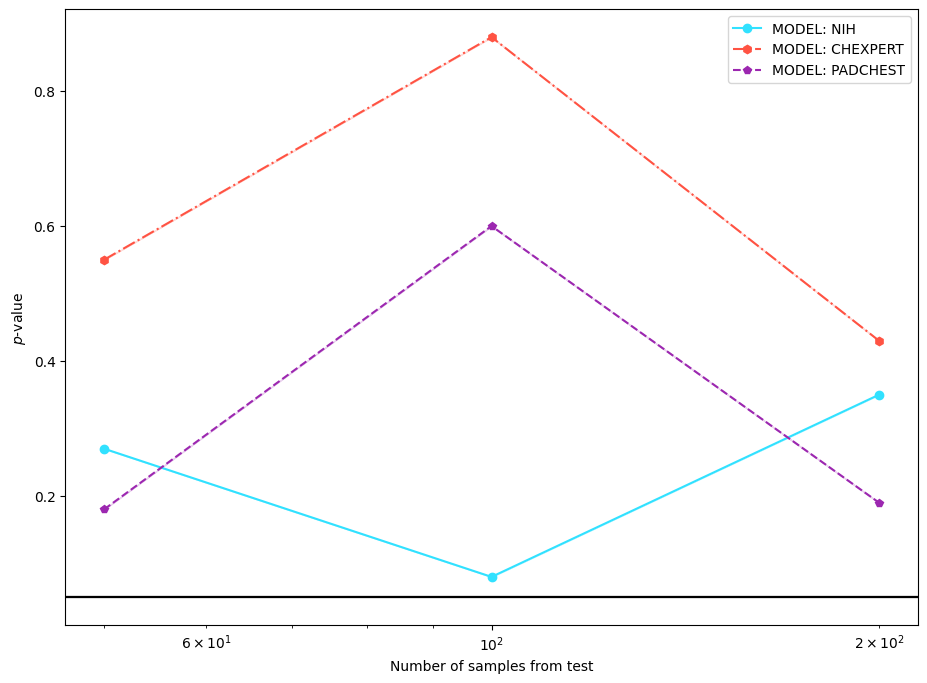

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 55970.22 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78787.43 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91925.19 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99284.43 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 104311.65 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107911.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49678.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70225.80 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84951.70 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95037.71 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101305.92 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105390.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.32 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.86 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.34 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.50 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.53 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.86 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.83 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.89 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.66 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51123.02 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71793.67 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85032.84 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 94985.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 100645.25 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104252.61 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54062.32 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77288.54 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89610.70 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97769.81 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102706.48 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106265.52 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.74 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.12 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.70 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.94 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.60 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.11 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.88 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.12 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.66 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.65 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.70 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.58 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58938.99 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 91668.62 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 110045.14 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 110666.20 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110109.97 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 110927.88 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48200.81 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 68964.62 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 77996.33 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87771.42 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96295.65 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104231.98 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.71 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.31 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.12 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.51 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.98 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.28 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.75 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.45 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.81 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.50 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.11 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.67 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.31 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51267.95 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 74950.88 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91185.93 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98697.77 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102489.29 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105319.26 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51461.20 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76000.53 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 89167.59 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96721.29 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 100817.80 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107443.93 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.13 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.63 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.42 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.72 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.36 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.46 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.00 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.84 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.44 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.30 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.99 examples/s]

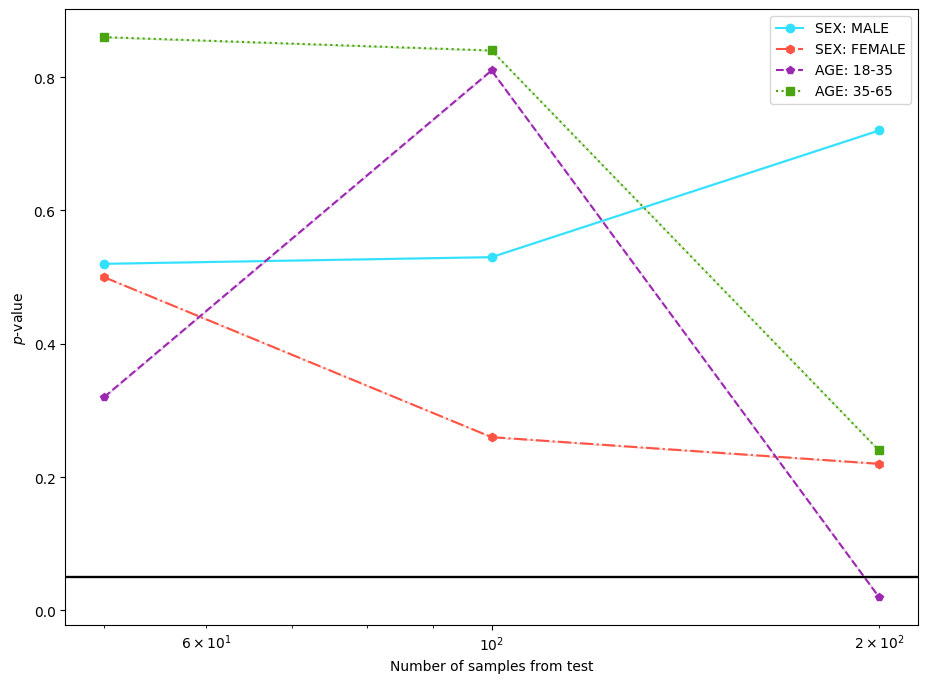

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.96 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.01 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.11 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.59 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.95 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.32 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.65 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.47 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.25 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.65 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.88 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.64 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.50 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.68 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.75 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.70 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.10 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.51 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.41 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.82 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.79 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.56 examples/s]

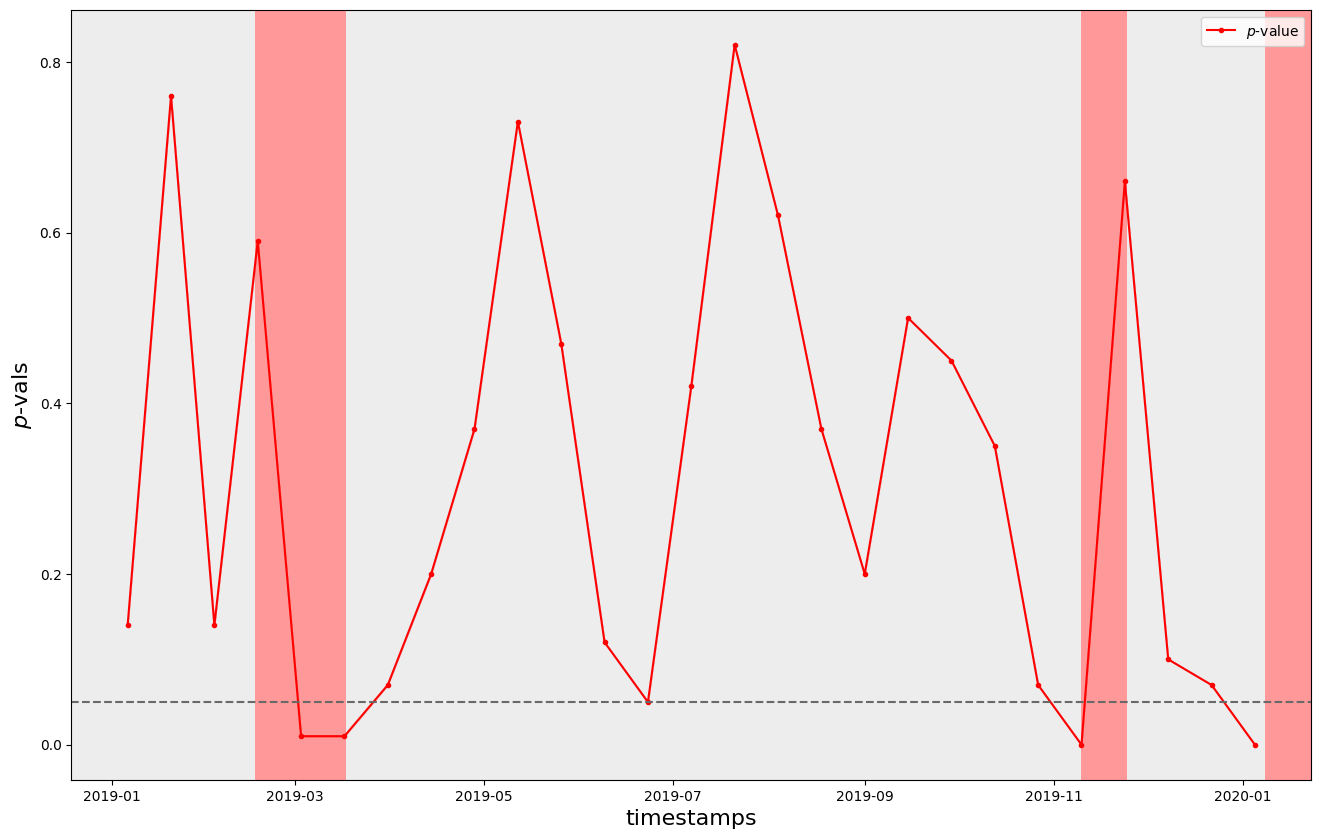

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)